# Effort and cost Estimation in Agile Software Development

In [40]:
#@title Effort Estimation on Maxwell
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/csv_result-kemerer.csv')

In [41]:
data_read.head()

,id,ID,Language,Hardware,Duration,KSLOC,AdjFP,RAWFP,EffortMM
0,1,1,1,1,17,253.6,1217.1,1010,287.00
1,2,2,1,2,7,40.5,507.3,457,82.50
2,3,3,1,3,15,450.0,2306.8,2284,1107.31
3,4,4,1,1,18,214.4,788.5,881,86.90
4,5,5,1,2,13,449.9,1337.6,1583,336.30


In [42]:
#@title Defining Category 1 and Category 2


features = [	'Hardware',	'Duration',	'KSLOC',	'AdjFP'	, 'RAWFP']




Cat_1 = data_read[features]
Cat_2 = data_read['EffortMM']

In [43]:

#@title Describing Categorical Data 
Cat_1.describe()


,Hardware,Duration,KSLOC,AdjFP,RAWFP
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.333333,14.266667,186.573333,999.140000,993.866667
std,1.676163,7.544787,136.817420,589.592082,597.426130
min,1.000000,5.000000,39.000000,99.900000,97.000000
25%,1.000000,9.000000,55.100000,599.100000,581.000000
50%,2.000000,14.000000,164.800000,993.000000,976.000000
75%,3.500000,17.500000,253.900000,1342.550000,1464.500000
max,6.000000,31.000000,450.000000,2306.800000,2284.000000


In [44]:
#For debugging purpose
#print(Cat_1)

In [45]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Hardware,Duration,KSLOC,AdjFP,RAWFP
0,1,17,253.6,1217.1,1010
1,2,7,40.5,507.3,457
2,3,15,450.0,2306.8,2284
3,1,18,214.4,788.5,881
4,2,13,449.9,1337.6,1583
5,4,5,50.0,421.3,411
6,4,5,43.0,99.9,97
7,2,11,200.0,993.0,998
8,1,14,289.0,1592.9,1554
9,1,5,39.0,240.0,250


In [46]:
print('The overall number of projects are: ',len(Cat_2))

The overall number of projects are:  15


In [47]:
display(Cat_2)

0      287.00
1       82.50
2     1107.31
3       86.90
4      336.30
5       84.00
6       23.20
7      130.30
8      116.00
9       72.00
10     258.70
11     230.70
12     157.00
13     246.90
14      69.90
Name: EffortMM, dtype: float64

In [48]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [49]:
import math
print(y_test)


1     82.5
6     23.2
8    116.0
Name: EffortMM, dtype: float64


In [50]:
print(y_pred1)

[ 20.28176633 -32.75698349 456.06868732]


In [51]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [52]:
from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math




print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear effort

The r Score on the predictrd trained Set: -26.77
MMRE 2.0325753221168124
MdMRE 2.411938943431135
PRED 25% 0.0


In [53]:

#   diff=np.absolute(y_test-y_pred1)
#   MRE=diff/y_test
#   MMRE=np.mean(MRE)

# print('MMRE :',MMRE)

Text(0.5, 1.0, 'Effort Actual vs Predicted Linear Regresssion')

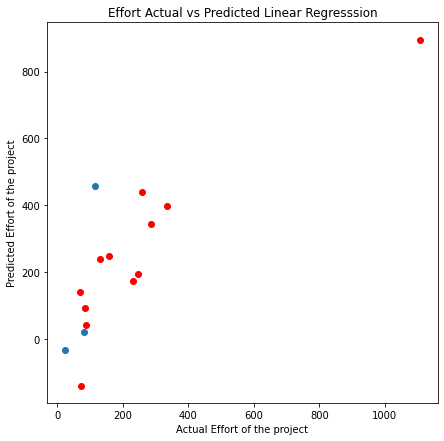

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Effort Actual vs Predicted Linear Regresssion')




In [55]:
##Debugging pur   
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [56]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1})

#print(pred_y_diff.dtypes)
#
#pred_y_diff= pd.DataFrame(range(3), columns=['y_pred1'])
#pred_y_diff.y_pred1 = pred_y_diff.y_pred1.astype(float)


pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
1,82.5,20.281766,62.218234
6,23.2,-32.756983,55.956983
8,116.0,456.068687,-340.068687


In [57]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [58]:

print(arr)

   Actual  Cost
1          82.5
6          23.2
8         116.0


In [59]:
print(np.absolute(arr2))

   Difference
1   62.218234
6   55.956983
8  340.068687


In [60]:
arr22= [];
arr11=[];
i=1
k=1
for i in arr:
  xx= arr[i]
  arr22.append(xx)
for k in arr1:
  yy= arr1[k]
  arr11.append(yy)

In [61]:
#print(arr22[0][0])
#print(arr11[0][0])
print(len(arr11))
Diff=[];
i=0
#for i in range(0,5):
   # vv=arr22[0][i]-arr11[0][i]
#    Diff.append(vv)
#    print(vv)

1


In [62]:
#pred_y_diff = pd.DataFrame({'Actual  Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1,'MMRE':1/6((y_test-y_pred1)/y_test) })

In [63]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))

diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)


#KNN EFFORT

The r Score on the predictrd trained Set: -6.73
MMRE 1.7270085916637639
MdMRE 1.4192528735632184
PRED 25% 0.0


In [64]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
1,82.5,104.333333,-0.264646
6,23.2,104.333333,-3.497126
8,116.0,280.633333,-1.419253


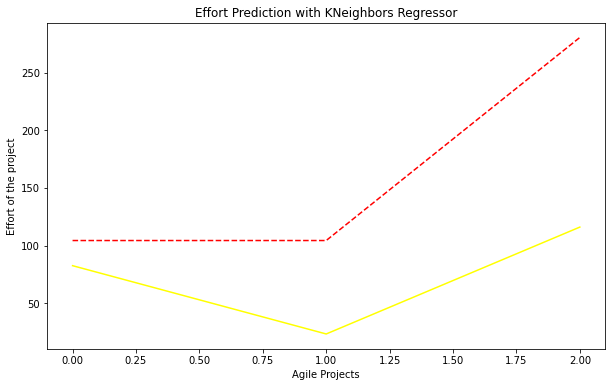

In [65]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')

plt.xlabel('Agile Projects')
plt.ylabel('Effort of the project')
plt.title('Effort Prediction with KNeighbors Regressor')
#plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show()

----------------------------

In [66]:
# #@title CALCULATING THE MMRE

# #MAKING THE VALUES ABSOLUTE 
# xyy=pred_mre.MRE.abs()
# Raw_mean = xyy.sum()/len(pred_mre) #Total Projects in the Dataset are 21
# #print('MMRE :',Raw_mean)

# # percentage MMRE 
# print(Raw_mean)
# #print('Percentage MMRE :',Raw_mean*100)

Decision Tree Implementation

## Decision Tree Implementation 

In [67]:
data_read.head()

,id,ID,Language,Hardware,Duration,KSLOC,AdjFP,RAWFP,EffortMM
0,1,1,1,1,17,253.6,1217.1,1010,287.00
1,2,2,1,2,7,40.5,507.3,457,82.50
2,3,3,1,3,15,450.0,2306.8,2284,1107.31
3,4,4,1,1,18,214.4,788.5,881,86.90
4,5,5,1,2,13,449.9,1337.6,1583,336.30


In [68]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['EffortMM'],axis=1)
X.shape

(15, 8)

In [69]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [71]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [72]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [73]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [74]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [75]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 8056.726666666666
Mean Absolute Error:: 71.33333333333333
Root Mean Squared Error:: 89.75927064468976


In [76]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))



The r Score on the predictrd trained Set: -4.47


<function matplotlib.pyplot.show(*args, **kw)>

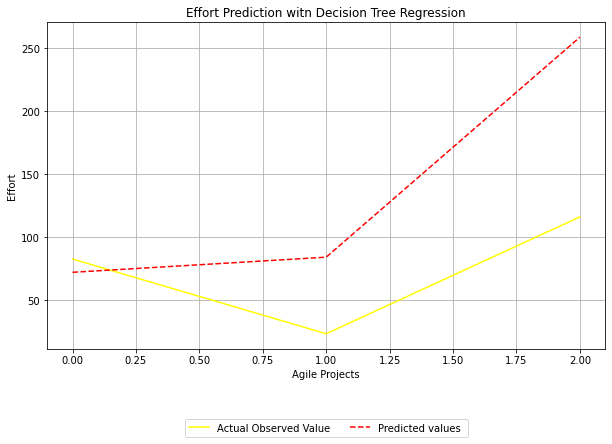

In [77]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [78]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
1,82.5,72.0,0.127273
6,23.2,84.0,-2.620690
8,116.0,258.7,-1.230172


CALCULATING MRE MMRE MdMRE and PRED 25

In [79]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#DT EFFORT

The r Score on the predictrd trained Set: -4.47
MMRE 1.3260449320794148
MdMRE 1.2301724137931034
PRED 25% 33.33333333333333


In [80]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
1,82.5,72.0,10.5
6,23.2,84.0,-60.8
8,116.0,258.7,-142.7


In [81]:
#@title Random Forest Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [82]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [83]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [84]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [85]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.97
r2 Score  -5.212268225239951


In [86]:
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 9146.239677777776
Mean Absolute Error:: 77.63444444444444
Root Mean Squared Error:: 95.63597480957559


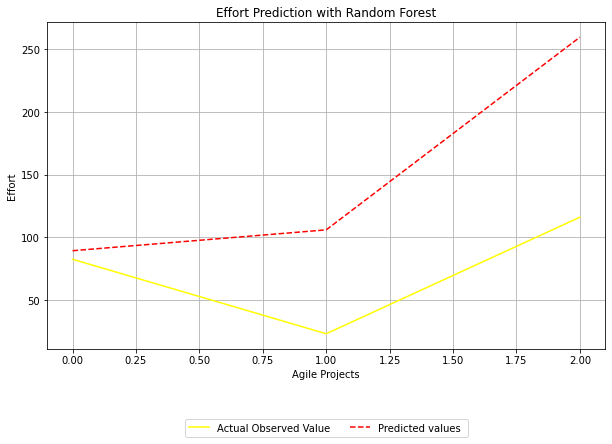

In [87]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [88]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
1,82.5,89.326667,-0.082747
6,23.2,105.933333,-3.566092
8,116.0,259.343333,-1.235718


In [89]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



The r Score on the predictrd trained Set: -5.21
MMRE 1.6281859398583538
MdMRE 1.2357183908045974
PRED 25% 33.33333333333333


In [90]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

MMRE_RF = Raw_mean*100
# percentage MMRE 
###print(' MMRE in Percentage :',Raw_mean*100,'%')

MMRE : 1.6281859398583538


# Support Vector Machine